In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

%matplotlib notebook

### Functions

In [1]:
def TendonForce (Lnorm_see,Lslack, Lce_o):
    '''
    Compute tendon force

    Inputs:
        Lnorm_see = normalized tendon length
        Lslack = slack length of the tendon (non-normalized)
        Lce_o = optimal length of the fiber
    
    Output:
        Fnorm_tendon = normalized tendon force
        
    '''
    Umax = .04
    
    if Lnorm_see<Lslack/Lce_o: 
        Fnorm_tendon = 0
    else: 
        Fnorm_tendon = ((Lnorm_see-Lslack/Lce_o)/(Umax*Lslack/Lce_o))**2
        
    return Fnorm_tendon

In [2]:
def ParallelElementForce (Lnorm_ce):
    '''
    Compute parallel element force
    
    Inputs:
        Lnorm_ce = normalized contractile element length
    
    Output:
        Fnorm_kpe = normalized parallel element force

    '''
    Umax = 1
    
    if Lnorm_ce< 1: 
        Fnorm_kpe = 0
    else: 
        Fnorm_kpe = ((Lnorm_ce-1)/(Umax*1))**2 
        
    return Fnorm_kpe

In [3]:
def ForceLengthCurve (Lnorm_ce,width):
    F0 = max([0, (1-((Lnorm_ce-1)/width)**2)])
    return F0

In [4]:
def ContractileElementDot(F0, Fnorm_CE, a):
    
    '''
    Compute Contractile Element Derivative

    Inputs:
        F0 = Force-Length Curve
        Fce = Contractile element force
    
    Output:
        Lnorm_cedot = normalized contractile element length derivative

    '''
    
    FMlen = 1.4 # young adults
    Vmax = 10  # young adults
    Af = 0.25  #force-velocity shape factor
    
    Fnorm_CE = min(FMlen*a*F0 - 0.001, Fnorm_CE)
    
    if  Fnorm_CE > a*F0:
        
        b = ((2 + 2/Af)*(a*F0*FMlen - Fnorm_CE))/(FMlen-1)
        
    elif Fnorm_CE <= a*F0:
        
        b = a*F0 + Fnorm_CE/Af
    
    Lnorm_cedot = (.25 + .75*a)*Vmax*((Fnorm_CE - a*F0)/b)
    
    return Lnorm_cedot

In [5]:
def ContractileElementForce(Fnorm_tendon,Fnorm_kpe, alpha):
    '''
    Compute Contractile Element force

    Inputs:
        Fnorm_tendon = normalized tendon force
        Fnorm_kpe = normalized parallel element force
    
    Output:
        Fnorm_CE = normalized contractile element force
    '''
    Fnorm_CE = Fnorm_tendon/np.cos(alpha) - Fnorm_kpe
    return Fnorm_CE

In [6]:
def tendonLength(Lm,Lce_o,Lnorm_ce, alpha):
    '''
    Compute tendon length
    
    Inputs:
        Lm = 
        Lce_o = optimal length of the fiber
        Lnorm_ce = normalized contractile element length
    
    Output:
        Lnorm_see = normalized tendon length   
    '''
    Lnorm_see = Lm/Lce_o - Lnorm_ce*np.cos(alpha)
    
    return Lnorm_see

In [7]:
def activation(a,u,dt):
    '''
    Compute activation
    
    Inputs:
        u = idealized muscle excitation signal, 0 <= u <= 1
        a = muscular activation
        dt = time step
    
    Output:
        a = muscular activation  
    '''
    
    tau_deact = 50e-3 #young adults
    tau_act = 15e-3
    
    if u>a:
        tau_a = tau_act*(0.5+1.5*a)
    elif u <=a:
        tau_a = tau_deact/(0.5+1.5*a)
    
    #-------
    dadt = (u-a)/tau_a # euler
    
    a = a + dadt*dt
    #-------
    return a

In [8]:
def ComputeTotalLenghtSize(Lm0,phi,Rf,Rcm):
    '''
    Inputs:
        Lm0 = initial lenght of the muscle
        Phi = degree flexion of the joint
        RF = Moment arm
        Lce_o = optimal size of the muscle
    Output:
        Lm = total muscle lenght
    '''
    Lm = Lm0 - (phi-(math.pi/2))*Rf #total muscle-tendon length from joint angle
    return Lm

In [9]:
def ComputeMomentJoint(Rf,Fnorm_tendon,Fmax,m,g):
    '''
    Inputs:
        RF = Moment arm
        Fnorm_tendon = Normalized tendon force
        m = Segment Mass
        g = Acelleration of gravity
        Fmax= maximal isometric force
    Output:
        M = Total moment with respect to joint
    '''
    M=Rf*Fnorm_tendon*Fmax - m*g*Rcm*np.sin(phi-(math.pi/2))
    return M

In [10]:
def ComputeAngularAcelerationJoint (M,I):
    '''
    Inputs:
        M = Total moment with respect to joint
        I = Moment of Inertia
    Output:
        phidd= angular aceleration of the joint
    '''
    phidd = M/I
    return phidd

### General Purpose

For dorsiflexors muscle, obtain the ankle angle  
$\theta_{perna} - \theta_{pé}$

### Lembretes

Para comprimento do músculo+tendão, usar o polinômio de 4ª ordem em que entram os A's de um artigo lá

Tomar cuidado que há coisas na tabela que estão em graus mas nos cálculos usamos radianos

*Rf* é mx no artigo que ele mencionou  
. $B_{x}$ retirar de uma tabela que tem no artigo

$L_ce = L_{0}^{M}$  

$L_{slack} = L_{s}^{T} * L_{0}^{M} $

  
$M = T_{M} - M_{G}$  

tal que $T_{M} = F_{M} * R_{f}$

$R_{CM} = $  

$R_{f}(\theta)$ é um polinômio de 4ª ordem que no artigo é chamado de $m_{x}$



In [ ]:
g = 9.81# acceleration of gravity

In [ ]:
Lfoot = 0.26 # [m]
m = 75 # [kg]

mtable = 0.0145
mfoot = mtable * m

Rcmtable = 0.5
Rcmfoot = Rcmtable * Lfoot

Rgirotable = 0.69
Rgirofoot = Rgirotable * Lfoot

Ifoot = mfoot * (Rgirofoot**2)

In [12]:
Lslack = 2.4 * 0.09 # sack length of SEE
Umax = .04 # SEE strain at Fmax
Lce_o = .090 #optmal L_{0}^{M} M é o 
width = .63#*Lce_o
Fmax = 1400 #maximal isometric force for dorsiflexors
a = 1 #inital conditional for ativation
u = 1 #Initial conditional for Brain's activation
#b = .25*10#*Lce_o

### Joint Properties

In [13]:
g = 9.81# acceleration of gravity


### Initial conditions

In [14]:
phi = math.pi/2 #start as 90 degree flexion
phid = 0 #zero velocity
Lm0 = 0.306 #initial total lenght of the muscle  -- isso é o TA de um dos artigos que eles mostraram
Lm = 0.31 #initial total lenght of the muscle
Lnorm_ce = .087/Lce_o #norm
t0 = 0 #Initial time
tf = 0.15 #Final Time
h = 5e-4 #integration step size and step counter

In [15]:
t = np.arange(t0,tf,h)
F = np.empty(t.shape)
phivec=np.empty(t.shape)
Fkpe = np.empty(t.shape)
FiberLen = np.empty(t.shape)
TendonLen = np.empty(t.shape)
a_dynamics = np.empty(t.shape)
FiberVelocity = np.empty(t.shape)

In [16]:
#Normalizing
alpha = 7*np.pi/180

for i in range (len(t)):
    
    Lm =  ComputeTotalLenghtSize(Lm0,phi,Rf,Rcm)
    
    Lnorm_see = tendonLength(Lm,Lce_o,Lnorm_ce, alpha)

    Fnorm_tendon = TendonForce (Lnorm_see,Lslack, Lce_o) 
    
    Fnorm_kpe = ParallelElementForce (Lnorm_ce)     
        
    #isometric force at Lce from CE force length relationship
    F0 = ForceLengthCurve (Lnorm_ce,width)
    
    Fnorm_CE = ContractileElementForce(Fnorm_tendon,Fnorm_kpe, alpha) #Fnorm_CE = ~Fm
    
    #computing activation
    a = activation(a,u,h)
    
    #calculate CE velocity from Hill's equation    
    Lnorm_cedot = ContractileElementDot(F0, Fnorm_CE,a)
    
    #Compute MomentJoint
    M = ComputeMomentJoint(Rf,Fnorm_tendon,Fmax,m,g)
    
    #Compute Angular Aceleration Joint
    phidd = ComputeAngularAcelerationJoint (M,I)
    
    # Euler integration steps
    Lnorm_ce = Lnorm_ce + h*Lnorm_cedot
    phid= phid + h*phidd
    phi  = phi  +h*phid
    phideg= (phi*180)/math.pi #convert joint angle from radians to degree


    # Store variables in vectors
    F[i] = Fnorm_tendon*Fmax
    Fkpe[i] = Fnorm_kpe*Fmax
    FiberLen[i] = Lnorm_ce*Lce_o
    TendonLen[i] = Lnorm_see*Lce_o
    a_dynamics[i] = a
    phivec[i] = phideg
    FiberVelocity[i] = Lnorm_cedot * Lce_o

Text(0,0.5,'Force (N)')

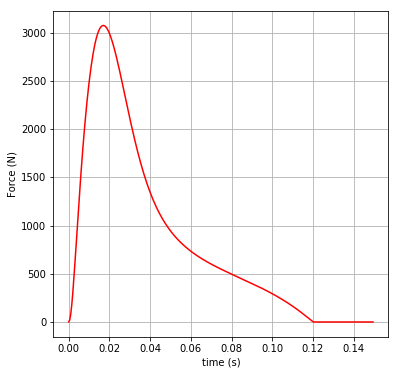

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,F,c='red')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Force (N)')

Text(0,0.5,'Knee Joint Angle (°)')

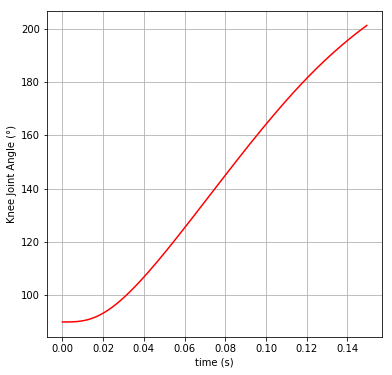

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,phivec,c='red')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Knee Joint Angle (°)')

Text(0,0.5,'Velocity of fiber')

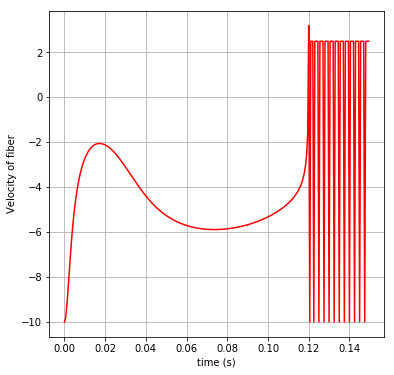

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,FiberVelocity,c='red')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Velocity of fiber')